In [19]:
import pandas as pd

In [20]:
df = pd.read_excel('dataset 3.xlsx')

In [21]:
df.to_excel("dataset.xlsx")

In [131]:
df.head(12)

,Unnamed: 0,rating,movie,year,country,rating_ball,overview,director,screenwriter,actors,url_logo,genrse
0,0,0,Побег из Шоушенка,1994,США,9.111,Бухгалтер Энди Дюфрейн обвинён в убийстве собс...,Фрэнк Дарабонт,Фрэнк Дарабонт; Стивен Кинг,Тим Роббинс; Морган Фриман; Боб Гантон; Уильям...,'https://st.kp.yandex.net/images/film_iphone/i...,Драма
1,1,1,Зеленая миля,1999,США,9.062,Пол Эджкомб — начальник блока смертников в тюр...,Фрэнк Дарабонт,Фрэнк Дарабонт; Стивен Кинг,Том Хэнкс; Дэвид Морс; Бонни Хант; Майкл Кларк...,'https://st.kp.yandex.net/images/film_iphone/i...,"Драма,Фэнтези"
2,2,2,Форрест Гамп,1994,США,8.913,От лица главного героя Форреста Гампа; слабоум...,Роберт Земекис,Эрик Рот; Уинстон Грум,Том Хэнкс; Робин Райт; Салли Филд; Гэри Синиз;...,'https://st.kp.yandex.net/images/film_iphone/i...,"Драма, Комедия, Мелодрама, История, Военный"
3,3,3,Список Шиндлера,1993,США,8.817,Фильм рассказывает реальную историю загадочног...,Стивен Спилберг,Стивен Зеллиан; Томас Кенилли,Лиам Нисон; Бен Кингсли; Рэйф Файнс; Кэролайн ...,'https://st.kp.yandex.net/images/film_iphone/i...,"Драма,Военный"
4,4,4,1+1,2011,Франция,8.807,Пострадав в результате несчастного случая; бог...,Оливье Накаш; Эрик Толедано,Оливье Накаш; Филипп Поццо ди Борго; Эрик Т...,Франсуа Клюзе; Омар Си; Анн Ле Ни; Одри Флеро;...,'https://st.kp.yandex.net/images/film_iphone/i...,"Комедия,Драма"
5,5,5,Начало,2010,США,8.662,Кобб — талантливый вор; лучший из лучших в опа...,Кристофер Нолан,Кристофер Нолан,Леонардо ДиКаприо; Джозеф Гордон-Левитт; Эллен...,'https://st.kp.yandex.net/images/film_iphone/i...,"Фантастика, Боевик, Триллер, Драма, Детектив"
6,6,6,Леон,1994,Франция,8.681,Профессиональный убийца Леон; не знающий пощад...,Люк Бессон,Люк Бессон,Жан Рено; Гари Олдман; Натали Портман; Дэнни А...,'https://st.kp.yandex.net/images/film_iphone/i...,"Боевик,Драма,Триллер"
7,7,7,Король Лев,1994,США,8.772,У величественного Короля-Льва Муфасы рождается...,Роджер Аллерс; Роб Минкофф,Ирен Меччи; Джонатан Робертс; Линда Вулверт...,Мэттью Бродерик; Джереми Айронс; Нэйтан Лейн; ...,'https://st.kp.yandex.net/images/film_iphone/i...,"Мультфильм, Мюзикл, Фэнтези, Драма, Приключени..."
8,8,8,Бойцовский клуб,1999,США,8.645,Сотрудник страховой компании страдает хроничес...,Дэвид Финчер,Джим Улс; Чак Паланик,Эдвард Нортон; Брэд Питт; Хелена Бонем Картер;...,'https://st.kp.yandex.net/images/film_iphone/i...,"Триллер,Драма,Преступление"
9,9,9,Иван Васильевич меняет профессию,1973,СССР,8.782,Инженер-изобретатель Тимофеев сконструировал м...,Леонид Гайдай,Владлен Бахнов; Леонид Гайдай; Михаил Булгаков,Александр Демьяненко; Юрий Яковлев; Леонид Кур...,'https://st.kp.yandex.net/images/film_iphone/i...,"Комедия,Фантастика,Приключение"


In [23]:
train_df = pd.read_excel('dataset 3.xlsx', engine='openpyxl')

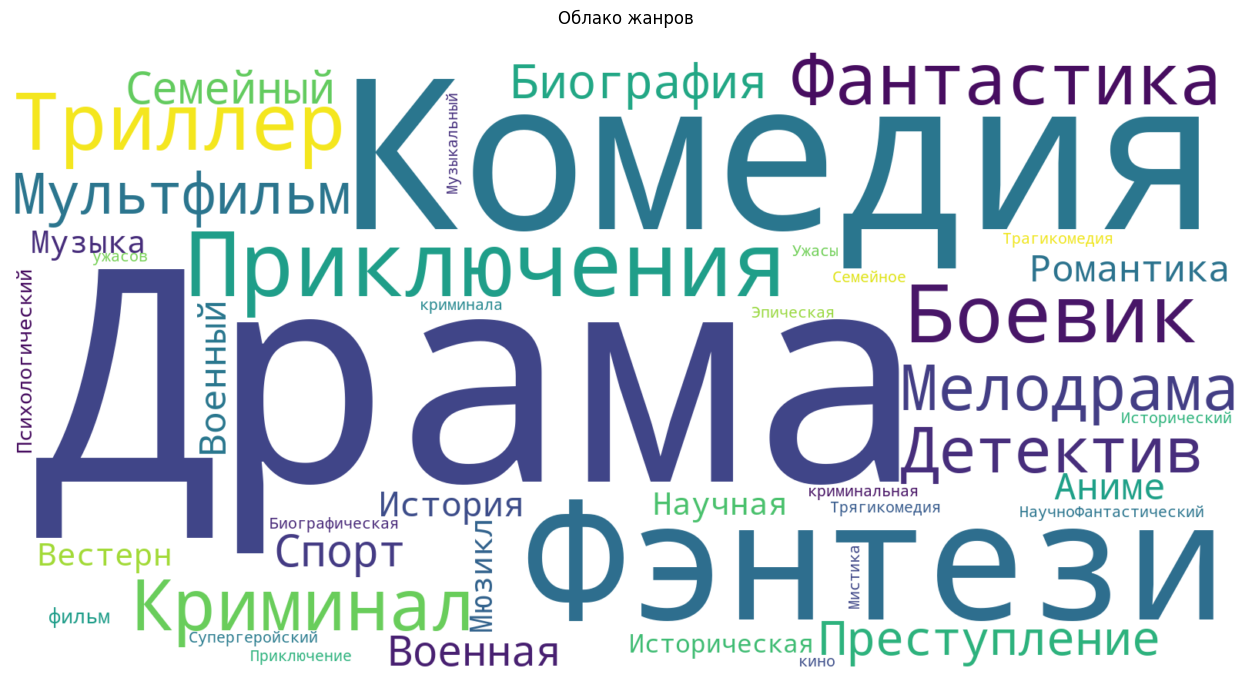

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re
train_df = pd.read_excel('dataset 3.xlsx')
train_df['genre'] = train_df['genre'].astype(str).fillna('')
genres_list = []
for genre_str in train_df['genre']:
    cleaned = re.sub(r'[^\w,\s]', '', genre_str) 
    genres = [g.strip() for g in cleaned.split(',') if g.strip()]
    genres_list.extend(genres)
genres_text = ' '.join(genres_list)
stopwords = set(STOPWORDS)
stopwords.update(['the', 'and', 'of', 'in', 'to', 'a'])  
stopwords.update(['и', 'в', 'на', 'с', 'для'])  
wordcloud = WordCloud(
    stopwords=stopwords,
    background_color='white',
    width=1600,
    height=800,-
    collocations=False,  
    min_word_length=3,  
).generate(genres_text)
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Облако жанров', pad=20)
plt.show()




In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 250,300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error'
)
grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучший MSE:", -grid_search.best_score_)

Лучшие параметры: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}
Лучший MSE: 0.052289367579099535


In [157]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import ndcg_score
import joblib
from scipy.sparse import hstack
data = {
    'movie': ['Леон', '1+1', 'Форрест Гамп', 'Крестный отец', 'Побег из Шоушенка', 
              'Зеленая миля', 'Список Шиндлера', 'Начало', 'Интерстеллар', 'Бойцовский клуб'],
    'genre': ['драма, криминал', 'драма, комедия', 'драма, мелодрама', 'драма, криминал', 
              'драма', 'драма', 'драма, военный', 'фантастика, боевик', 
              'фантастика, драма', 'драма, триллер'],
    'rating': [8.7, 8.8, 8.9, 9.2, 9.3, 9.1, 8.9, 8.7, 8.6, 8.7],
    'year': [1994, 2011, 1994, 1972, 1994, 1999, 1993, 2010, 2014, 1999],
    'country': ['Франция', 'Франция', 'США', 'США', 'США', 'США', 'США', 'США', 'США', 'США'],
    'director': ['Люк Бессон', 'Оливье Накаш', 'Роберт Земекис', 'Фрэнсис Форд Коппола', 
                 'Фрэнк Дарабонт', 'Фрэнк Дарабонт', 'Стивен Спилберг', 'Кристофер Нолан', 
                 'Кристофер Нолан', 'Дэвид Финчер'],
    'actors': ['Жан Рено, Натали Портман', 'Франсуа Клюзе, Омар Си', 'Том Хэнкс, Робин Райт', 
               'Марлон Брандо, Аль Пачино', 'Тим Роббинс, Морган Фриман', 
               'Том Хэнкс, Дэвид Морс', 'Лиам Нисон, Рэйф Файнс', 'Леонардо ДиКаприо, Джозеф Гордон-Левитт',
               'Мэттью Макконахи, Энн Хэтэуэй', 'Брэд Питт, Эдвард Нортон']
}
df = pd.DataFrame(data)
df['combined_features'] = df['genre'] + ' ' + df['director'] + ' ' + df['actors']
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)
tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
tfidf_matrix = tfidf.fit_transform(train_df['combined_features'])
year_normalized = (train_df['year'] - train_df['year'].min()) / (train_df['year'].max() - train_df['year'].min())
rating_normalized = train_df['rating'] / train_df['rating'].max()
final_features = hstack([
    tfidf_matrix,
    np.array(rating_normalized).reshape(-1, 1),
    np.array(year_normalized).reshape(-1, 1)
])
model = NearestNeighbors(
    n_neighbors=6,
    metric='cosine',
    algorithm='brute'
)
model.fit(final_features)
def get_recommendations(movie_name, model, tfidf_vectorizer, movies_df, top_n=5):
    try:
        movie_index = movies_df[movies_df['movie'] == movie_name].index[0]
        text_features = tfidf_vectorizer.transform([movies_df.loc[movie_index, 'combined_features']])
        year_norm = (movies_df.loc[movie_index, 'year'] - movies_df['year'].min()) / (movies_df['year'].max() - movies_df['year'].min())
        rating_norm = movies_df.loc[movie_index, 'rating'] / movies_df['rating'].max()
        query_features = hstack([
            text_features,
            np.array([[rating_norm]]),
            np.array([[year_norm]])
        ])
        distances, indices = model.kneighbors(query_features, n_neighbors=top_n+1)
        recommendations = movies_df.iloc[indices[0][1:top_n+1]]
        return recommendations[['movie', 'genre', 'rating', 'year']]
    except IndexError:
        return f"Фильм '{movie_name}' не найден в базе данных"
def evaluate_model(model, tfidf, test_df, train_df):
    test_scores = []
    
    for _, row in test_df.iterrows():
        try:
            text_features = tfidf.transform([row['combined_features']])
            year_norm = (row['year'] - train_df['year'].min()) / (train_df['year'].max() - train_df['year'].min())
            rating_norm = row['rating'] / train_df['rating'].max()
            
            query_features = hstack([
                text_features,
                np.array([[rating_norm]]),
                np.array([[year_norm]])
            ])
            distances, indices = model.kneighbors(query_features, n_neighbors=5)
            true_relevance = train_df.iloc[indices[0]]['rating'].values
            ideal_relevance = np.sort(true_relevance)[::-1]
            ndcg = ndcg_score([ideal_relevance], [true_relevance])
            test_scores.append(ndcg)
        except:
            continue
    return np.mean(test_scores)
print("Рекомендации для 'Леон':")
print(get_recommendations('Иван Васильевич меняет профессию', model, tfidf, train_df))
print("\nОценка качества модели (NDCG):")
print(f"Средний NDCG: {evaluate_model(model, tfidf, test_df, train_df):.3f}")
joblib.dump(model, 'improved_movie_recommender.joblib')
joblib.dump(tfidf, 'improved_tfidf_vectorizer.joblib')

Рекомендации для 'Леон':
Фильм 'Иван Васильевич меняет профессию' не найден в базе данных

Оценка качества модели (NDCG):
Средний NDCG: 0.991


['improved_tfidf_vectorizer.joblib']

In [128]:
df = pd.read_excel('dataset 3.xlsx')
df.head()

,Unnamed: 0,rating,movie,year,country,rating_ball,overview,director,screenwriter,actors,url_logo,genrse
0,0,0,Побег из Шоушенка,1994,США,9.111,Бухгалтер Энди Дюфрейн обвинён в убийстве собс...,Фрэнк Дарабонт,Фрэнк Дарабонт; Стивен Кинг,Тим Роббинс; Морган Фриман; Боб Гантон; Уильям...,'https://st.kp.yandex.net/images/film_iphone/i...,Драма
1,1,1,Зеленая миля,1999,США,9.062,Пол Эджкомб — начальник блока смертников в тюр...,Фрэнк Дарабонт,Фрэнк Дарабонт; Стивен Кинг,Том Хэнкс; Дэвид Морс; Бонни Хант; Майкл Кларк...,'https://st.kp.yandex.net/images/film_iphone/i...,"Драма,Фэнтези"
2,2,2,Форрест Гамп,1994,США,8.913,От лица главного героя Форреста Гампа; слабоум...,Роберт Земекис,Эрик Рот; Уинстон Грум,Том Хэнкс; Робин Райт; Салли Филд; Гэри Синиз;...,'https://st.kp.yandex.net/images/film_iphone/i...,"Драма, Комедия, Мелодрама, История, Военный"
3,3,3,Список Шиндлера,1993,США,8.817,Фильм рассказывает реальную историю загадочног...,Стивен Спилберг,Стивен Зеллиан; Томас Кенилли,Лиам Нисон; Бен Кингсли; Рэйф Файнс; Кэролайн ...,'https://st.kp.yandex.net/images/film_iphone/i...,"Драма,Военный"
4,4,4,1+1,2011,Франция,8.807,Пострадав в результате несчастного случая; бог...,Оливье Накаш; Эрик Толедано,Оливье Накаш; Филипп Поццо ди Борго; Эрик Т...,Франсуа Клюзе; Омар Си; Анн Ле Ни; Одри Флеро;...,'https://st.kp.yandex.net/images/film_iphone/i...,"Комедия,Драма"


In [130]:
df = pd.read_excel('dataset 3.xlsx', 
parse_dates=['rating'])
df.head()

,Unnamed: 0,rating,movie,year,country,rating_ball,overview,director,screenwriter,actors,url_logo,genrse
0,0,0,Побег из Шоушенка,1994,США,9.111,Бухгалтер Энди Дюфрейн обвинён в убийстве собс...,Фрэнк Дарабонт,Фрэнк Дарабонт; Стивен Кинг,Тим Роббинс; Морган Фриман; Боб Гантон; Уильям...,'https://st.kp.yandex.net/images/film_iphone/i...,Драма
1,1,1,Зеленая миля,1999,США,9.062,Пол Эджкомб — начальник блока смертников в тюр...,Фрэнк Дарабонт,Фрэнк Дарабонт; Стивен Кинг,Том Хэнкс; Дэвид Морс; Бонни Хант; Майкл Кларк...,'https://st.kp.yandex.net/images/film_iphone/i...,"Драма,Фэнтези"
2,2,2,Форрест Гамп,1994,США,8.913,От лица главного героя Форреста Гампа; слабоум...,Роберт Земекис,Эрик Рот; Уинстон Грум,Том Хэнкс; Робин Райт; Салли Филд; Гэри Синиз;...,'https://st.kp.yandex.net/images/film_iphone/i...,"Драма, Комедия, Мелодрама, История, Военный"
3,3,3,Список Шиндлера,1993,США,8.817,Фильм рассказывает реальную историю загадочног...,Стивен Спилберг,Стивен Зеллиан; Томас Кенилли,Лиам Нисон; Бен Кингсли; Рэйф Файнс; Кэролайн ...,'https://st.kp.yandex.net/images/film_iphone/i...,"Драма,Военный"
4,4,4,1+1,2011,Франция,8.807,Пострадав в результате несчастного случая; бог...,Оливье Накаш; Эрик Толедано,Оливье Накаш; Филипп Поццо ди Борго; Эрик Т...,Франсуа Клюзе; Омар Си; Анн Ле Ни; Одри Флеро;...,'https://st.kp.yandex.net/images/film_iphone/i...,"Комедия,Драма"


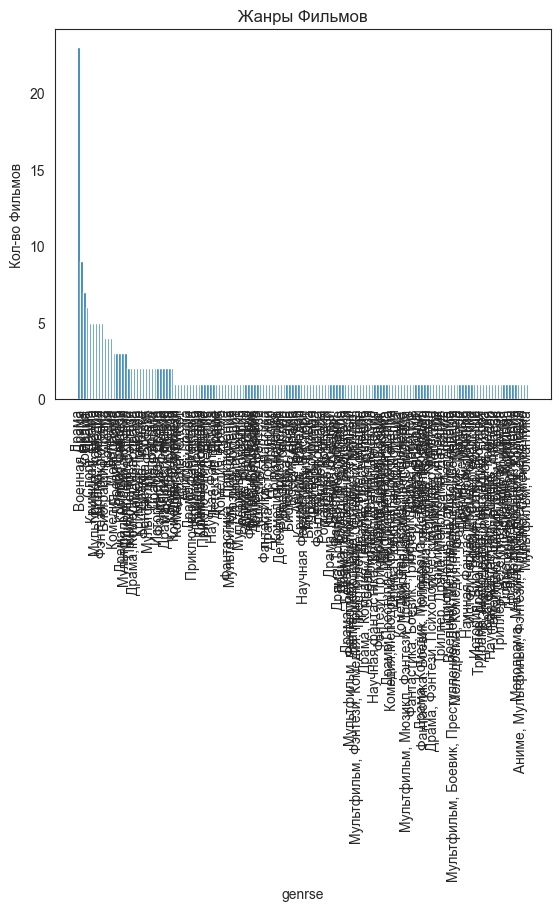

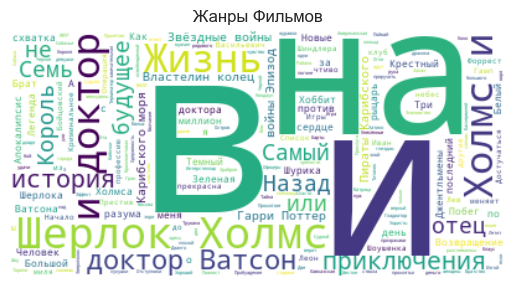

In [148]:
import matplotlib.pyplot as plt
genres = movies_meta['genrse'].str.split('|', expand=True).stack().value_counts()
plt.bar(genres.index, genres.values)
plt.xticks(rotation=90)
plt.xlabel('genrse')
plt.ylabel('Кол-во Фильмов')
plt.title('Жанры Фильмов')
plt.show()
from wordcloud import WordCloud
titles = ' '.join(movies_meta['movie'].tolist())
wordcloud = WordCloud(background_color='white').generate(titles)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Жанры Фильмов')
plt.show()